In [1]:
# import necessary module
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import seaborn as sns
from array_response import *
import itertools 

import matplotlib.pyplot as plt
import scipy
from scipy.stats import expon,gamma

### Alpha Simulation

In [2]:
Nt = 64 # number of transmit antennas
Nr = 16 # number of receive antennas
Ns = 1 # number of streams

Nc = 1 # number of cluster
Nray = 1 # number of rays in each cluster
realization = 10000 # equivalent to number of taking sample

At = np.zeros((Nt,Nc*Nray,realization),dtype=complex)
Ar = np.zeros((Nr,Nc*Nray,realization),dtype=complex)
alpha_hh = np.zeros((Nc*Nray,realization),dtype=complex)
alpha_hv = np.zeros((Nc*Nray,realization),dtype=complex)
alpha_vh = np.zeros((Nc*Nray,realization),dtype=complex)
alpha_vv = np.zeros((Nc*Nray,realization),dtype=complex)
var_hh = np.zeros((Nc*Nray,realization),dtype=float)

AoD = np.zeros((2,Nc*Nray),dtype=complex)
AoA = np.zeros((2,Nc*Nray),dtype=complex)

angle_sigma = 10/180*np.pi # standard deviation of the angles in azimuth and elevation both of Rx and Tx

_gamma = np.sqrt((Nt*Nr)/(Nc*Nray))
count = 0

eps = 0.1 # 20dB isolation
sigma = np.sqrt(8/(1+eps**2)) # according to the normalization condition of H

for reali in range(realization):
    for c in range(1,Nc+1):
        AoD_azi_m = np.random.uniform(0,2*np.pi,1) # Mean Angle of Departure _ azimuth
        AoD_ele_m = np.random.uniform(0,np.pi,1) # Mean Angle of Departure _ elevation
        AoA_azi_m = np.random.uniform(0,2*np.pi,1) # Mean Angle of Arrival_ azimuth
        AoA_ele_m = np.random.uniform(0,np.pi,1) # Mean Angle of Arrival_ elevation
        AoD[0,(c-1)*Nray:Nray*c] = np.random.laplace(AoD_azi_m, angle_sigma, (1,Nray))
        AoD[1,(c-1)*Nray:Nray*c] = np.random.laplace(AoD_ele_m, angle_sigma, (1,Nray))
        AoA[0,(c-1)*Nray:Nray*c] = np.random.laplace(AoA_azi_m, angle_sigma, (1,Nray))
        AoA[1,(c-1)*Nray:Nray*c] = np.random.laplace(AoA_ele_m, angle_sigma, (1,Nray))
    for j in range(Nc*Nray):
        At[:,j,reali] = array_response(AoD[0,j],AoD[1,j],Nt) # UPA array response
        Ar[:,j,reali] = array_response(AoA[0,j],AoA[1,j],Nr)
        var_hh = ((sigma**2)*(np.cos(AoD[0,j])**2)*(np.cos(AoA[0,j])**2)).real
        var_hv = ((eps**2)*(sigma**2)*(np.cos(AoD[1,j])**2)*(np.cos(AoA[0,j])**2)).real
        var_vh = ((eps**2)*(sigma**2)*(np.cos(AoD[0,j])**2)*(np.cos(AoA[1,j])**2)).real
        var_vv = ((sigma**2)*(np.cos(AoD[1,j])**2)*(np.cos(AoA[1,j])**2)).real
        alpha_hh[j,reali] = np.random.normal(0, np.sqrt(var_hh/2)) + 1j*np.random.normal(0, np.sqrt(var_hh/2))
        alpha_hv[j,reali] = np.random.normal(0, np.sqrt(var_hv/2)) + 1j*np.random.normal(0, np.sqrt(var_hv/2))
        alpha_vh[j,reali] = np.random.normal(0, np.sqrt(var_vh/2)) + 1j*np.random.normal(0, np.sqrt(var_vh/2))
        alpha_vv[j,reali] = np.random.normal(0, np.sqrt(var_vv/2)) + 1j*np.random.normal(0, np.sqrt(var_vv/2))

### Simulate gain for combination of polarisation 

In [3]:
azi_rot = np.random.uniform(0,2*np.pi,realization)
ele_rot = np.random.uniform(0,np.pi/2,realization) # Why PI/2 ??
ht_hr = np.zeros(realization,dtype=complex)
vt_hr = np.zeros(realization,dtype=complex)
ht_vr = np.zeros(realization,dtype=complex)
vt_vr = np.zeros(realization,dtype=complex)
same_cluster = np.zeros(realization,dtype=complex)
cross_polar = np.zeros(realization,dtype=complex)
same_polar = np.zeros(realization,dtype=complex)

for reali in range(realization):
    ht_hr[reali] = np.cos(ele_rot[reali])*np.cos(azi_rot[reali])*alpha_hh[0,reali]+np.sin(ele_rot[reali])*alpha_vh[0,reali]
    vt_hr[reali] = np.cos(ele_rot[reali])*np.cos(azi_rot[reali])*alpha_hv[0,reali]+np.sin(ele_rot[reali])*alpha_vv[0,reali]
    ht_vr[reali] = -np.sin(ele_rot[reali])*np.cos(azi_rot[reali])*alpha_hh[0,reali]+np.cos(ele_rot[reali])*alpha_vh[0,reali]
    vt_vr[reali] = -np.sin(ele_rot[reali])*np.cos(azi_rot[reali])*alpha_hv[0,reali]+np.cos(ele_rot[reali])*alpha_vv[0,reali]
    same_cluster[reali] = ht_hr[reali]+vt_hr[reali]+ht_vr[reali]+vt_vr[reali]
    cross_polar[reali] = vt_hr[reali]+ht_vr[reali]
    same_polar[reali] = ht_hr[reali]+vt_vr[reali]

### Distribution of gain for Same Cluster steering and Different Cluster - Cross Polar steering

2.13896670151
0.0309301899029
2.13896670151


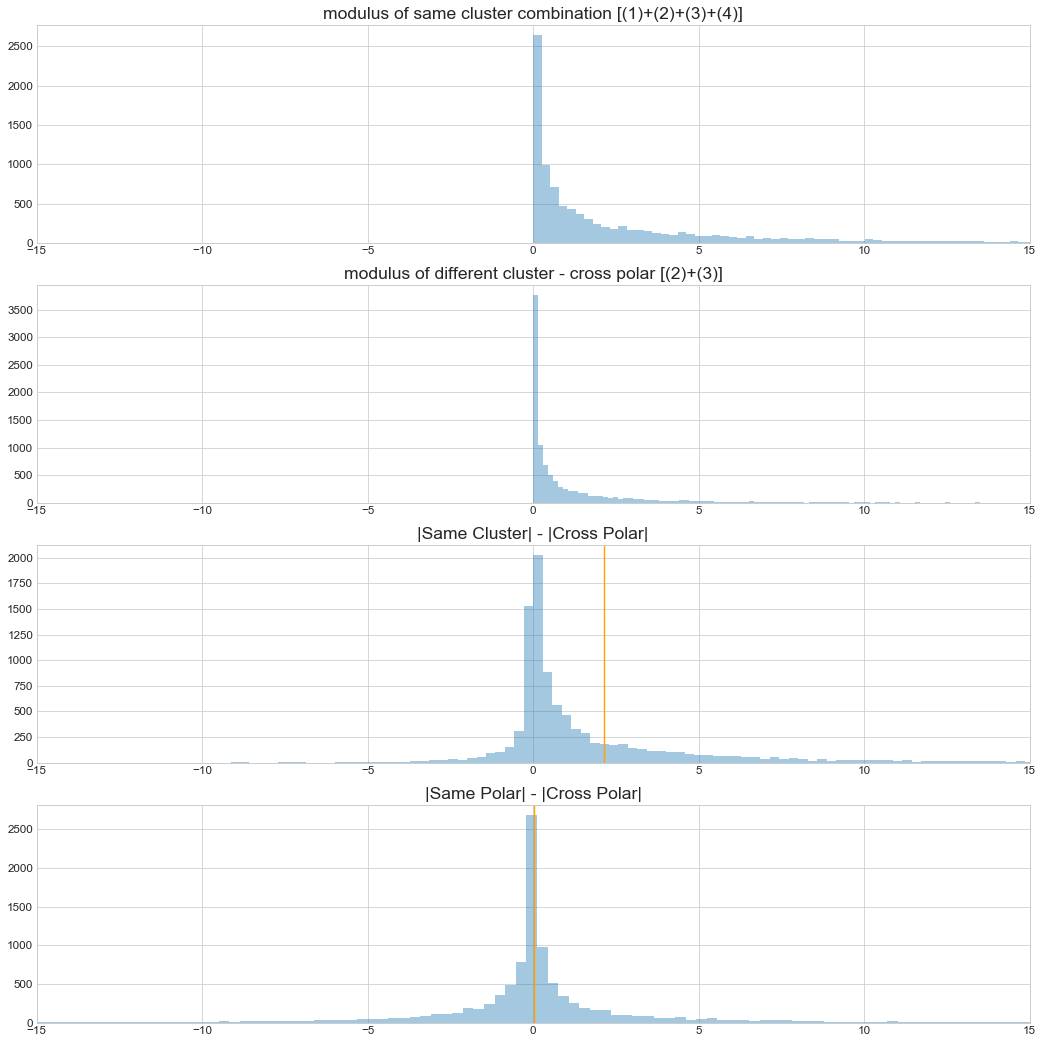

In [55]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,15), dpi=70)
# ax1 = fig.add_subplot(611)
# ax2 = fig.add_subplot(612)
ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)

ax1.set_xlim(-15,15)
ax1.set_title('modulus of same cluster combination [(1)+(2)+(3)+(4)]', fontsize=18)

ax2.set_xlim(-15,15)
ax2.set_title('modulus of different cluster - cross polar [(2)+(3)]', fontsize=18)

ax3.set_xlim(-15,15)
ax3.set_title('|Same Cluster| - |Cross Polar|', fontsize=18)

ax4.set_xlim(-15,15)
ax4.set_title('|Same Polar| - |Cross Polar|', fontsize=18)

# sns.distplot(np.abs(alpha_hh).reshape(1,-1),kde=False, ax=ax1)
# sns.distplot(np.angle(alpha_hh).reshape(1,-1),bins=100, kde = False, ax=ax2)
# sns.distplot(np.abs(ht_hr),bins=100, kde = False, ax=ax2)
# sns.distplot(np.angle(ht_hr),bins=100, kde = False, ax=ax4)

sns.distplot(np.abs(same_cluster)**2,bins=300, kde = False, ax=ax1)
sns.distplot(np.abs(cross_polar)**2,bins=300, kde = False, ax=ax2)
sns.distplot(np.abs(same_cluster)**2 - np.abs(cross_polar)**2,bins=300, kde = False, ax=ax3)
sns.distplot(np.abs(same_polar)**2 - np.abs(cross_polar)**2,bins=300, kde = False, ax=ax4 )
# ax1.axvline(x=np.mean(np.abs(same_cluster)**2),color = 'orange')
# ax2.axvline(x=np.mean(np.abs(same_cluster)**2 - np.abs(cross_polar)**2),color = 'orange')
ax3.axvline(x=np.mean(np.abs(same_cluster)**2 - np.abs(cross_polar)**2),color = 'orange')
ax4.axvline(x=np.mean(np.abs(same_polar)**2 - np.abs(cross_polar)**2), color = 'orange')
ax1.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax3.tick_params(axis='both', which='major', labelsize=12)
ax4.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()

print(np.mean(np.abs(same_cluster)**2 - np.abs(cross_polar)**2))
print(np.mean(np.abs(same_polar)**2 - np.abs(cross_polar)**2))
print(np.mean(np.abs(same_cluster)**2) - np.mean(np.abs(cross_polar)**2))

### Fit above histogram to Gamma Distribution

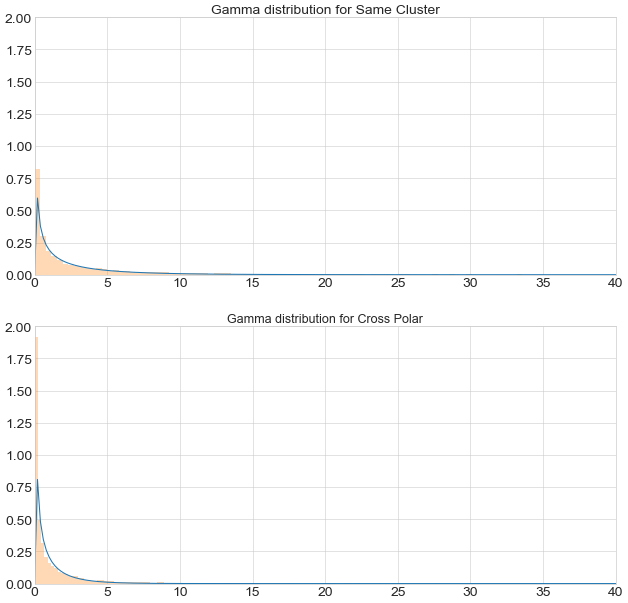

In [86]:
x = np.linspace(0,40,200)
# param_expon = expon.fit(np.abs(same_cluster)**2)
# pdf_fitted_expon = expon.pdf(x,0,scale=1.2)
fig = plt.figure(figsize=(15,15), dpi=50)
param_gamma = gamma.fit(np.abs(same_cluster)**2)
pdf_fitted_gamma = gamma.pdf(x,0.4,param_gamma[1],5)
# pdf_fitted_gamma[0] = 0.9

param_gamma_1 = gamma.fit(np.abs(cross_polar)**2)
pdf_fitted_gamma_1 = gamma.pdf(x,0.4,param_gamma_1[1],2)
# pdf_fitted_gamma_1[0] = 1.9

plt.subplot(2, 1, 1)
plt.title('Gamma distribution for Same Cluster',fontsize = 20)
plt.plot(x,pdf_fitted_gamma)
plt.hist(np.abs(same_cluster)**2,bins=200,normed=1,alpha=.3)
plt.ylim(0,2)
plt.xlim(0,40)
plt.tick_params(axis='both', which='major', labelsize=20)


plt.subplot(2, 1, 2)
plt.title('Gamma distribution for Cross Polar', fontsize = 18)
plt.plot(x,pdf_fitted_gamma_1)
plt.hist(np.abs(cross_polar)**2,bins=200,normed=1,alpha=.3)
plt.ylim(0,2)
plt.xlim(0,40)
plt.tick_params(axis='both', which='major', labelsize=20)


plt.show()
# print(param_gamma)

### PDF of Maximum of Combination Case

Let $Y_{1}$ ... $Y_{n}$ be i.i.d random variables, each with the same cumulative distribution function, $F_{Y}(y)=P(Y_{i}\leqslant y)$
$$F_{Y_{max}}(y)=P(Y_{max}\leqslant y)=P(Y_{1}\leqslant y,...,Y_{n}\leqslant y)=F_{Y}(y)^{n}$$

**Distribution of CDF max Cluster**

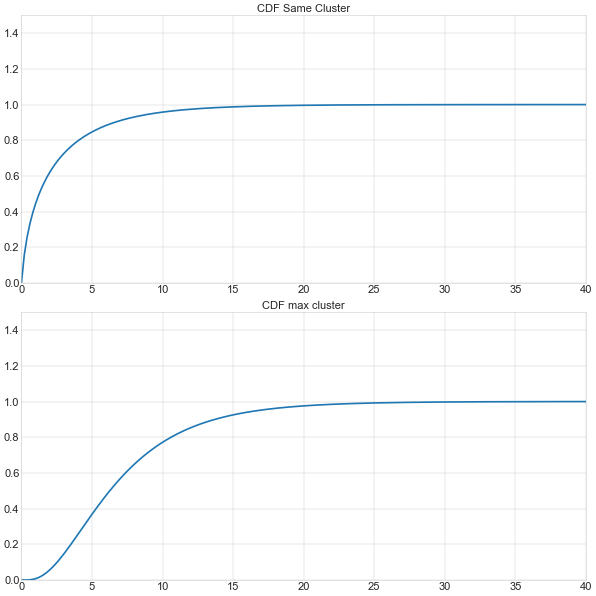

In [104]:
fig = plt.figure(figsize=(15,15), dpi=40)

cdf_fitted_gamma = np.cumsum(pdf_fitted_gamma/3.77003265)# need to review the normalize of PDF Gamma Function

plt.subplot(2, 1, 1)
plt.title('CDF Same Cluster',fontsize = 20)
plt.plot(x,cdf_fitted_gamma,lw=3)
plt.ylim(0,1.5)
plt.xlim(0,40)
plt.tick_params(axis='both', which='major', labelsize=20)

No_cluster = 6
max_sameclus_cdf = (cdf_fitted_gamma)**No_cluster
plt.subplot(2, 1, 2)
plt.title('CDF max cluster',fontsize = 20)
plt.plot(x,max_sameclus_cdf,lw=3)
plt.ylim(0,1.5)
plt.xlim(0,40)
plt.tick_params(axis='both', which='major', labelsize=20)

plt.tight_layout()

plt.show()
# print(cdf_fitted_gamma)

__Distribution of PDF max Cluster__

In [90]:
np.sum(x[0:-1]*max_sameclus_pdf/5)

7.253912164587069

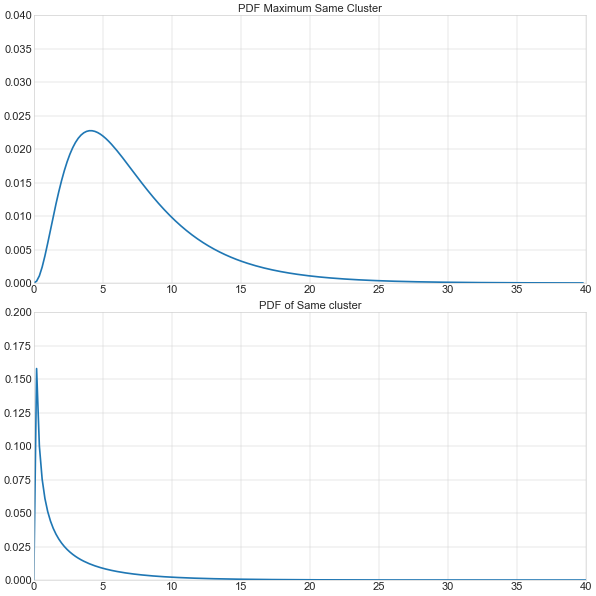

In [112]:
fig = plt.figure(figsize=(15,15), dpi=40)

max_sameclus_pdf = np.zeros(max_sameclus_cdf.shape,np.float)

max_sameclus_pdf = np.diff(max_sameclus_cdf)/np.diff(x)

max_sameclus_pdf[-1] = (max_sameclus_cdf[-1] - max_sameclus_cdf[-2])/(x[-1] - x[-2])

plt.subplot(2, 1, 1)
plt.title('PDF Maximum Same Cluster', fontsize = 20)
plt.plot(x[0:199],max_sameclus_pdf/5, lw = 3)
plt.ylim(0,0.04)
plt.xlim(0,40)
plt.tick_params(axis='both', which='major', labelsize=20)


plt.subplot(2, 1, 2)
plt.title('PDF of Same cluster', fontsize=20)
plt.plot(x,pdf_fitted_gamma/3.77003265, lw = 3)
plt.ylim(0,0.2)
plt.xlim(0,40)
plt.tick_params(axis='both', which='major', labelsize=20)

plt.tight_layout()

plt.show()

In [92]:
np.sum(x*pdf_fitted_gamma/3.77003265)

2.6287622479981239

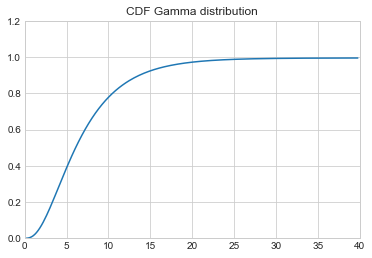

In [93]:
cdf_test = np.cumsum(max_sameclus_pdf/5) # need to review the normalize of PDF Gamma Function

plt.title('CDF Gamma distribution')
plt.plot(x[0:-1],cdf_test)
plt.ylim(0,1.2)
plt.xlim(0,40)
plt.show()
# print(cdf_fitted_gamma)